In [1]:
import hbutils as hb

hb.unzip_data('data/set_b.zip', 'data/wavfiles')

/home/svganesh/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
hb.convert_wavfiles_to_spectrograms('data/wavfiles', 'data/pngfiles', trim=2)

In [3]:
df = hb.load_df('data/set_b.csv', 'data/wavfiles', 'data/pngfiles')
df.head()

,dataset,fname,label,sublabel,iname
0,b,data/wavfiles/extrastole__127_1306764300147_C2...,extrastole,NaN,data/pngfiles/extrastole__127_1306764300147_C2...
1,b,data/wavfiles/extrastole__128_1306344005749_A.wav,extrastole,NaN,data/pngfiles/extrastole__128_1306344005749_A.png
2,b,data/wavfiles/extrastole__130_1306347376079_D.wav,extrastole,NaN,data/pngfiles/extrastole__130_1306347376079_D.png
3,b,data/wavfiles/extrastole__134_1306428161797_C1...,extrastole,NaN,data/pngfiles/extrastole__134_1306428161797_C1...
4,b,data/wavfiles/extrastole__138_1306762146980_B.wav,extrastole,NaN,data/pngfiles/extrastole__138_1306762146980_B.png


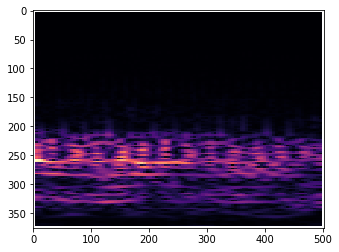

In [4]:
import IPython
%matplotlib inline

ind = df[df.label == 'normal'].first_valid_index()
hb.draw_spectrogram_png(df.loc[ind, 'iname'])

IPython.display.Audio(df.loc[ind, 'fname'])

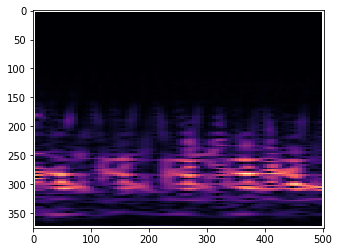

In [5]:
ind = df[df.label == 'murmur'].first_valid_index()
hb.draw_spectrogram_png(df.loc[ind, 'iname'])

IPython.display.Audio(df.loc[ind, 'fname'])

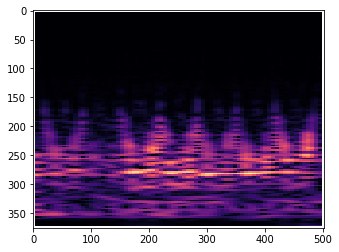

In [6]:
ind = df[df.label == 'extrastole'].first_valid_index()
hb.draw_spectrogram_png(df.loc[ind, 'iname'])

IPython.display.Audio(df.loc[ind, 'fname'])

In [7]:
label_map = {
    "normal": 0,
    "murmur": 1,
    "extrastole": 2
}

df = hb.load_spec_df(df, label_map, exclude_labels=[2])
df.head()

,spectrogram,label
46,data/pngfiles/murmur__112_1306243000964_A.png,1
47,data/pngfiles/murmur__112_1306243000964_B.png,1
48,data/pngfiles/murmur__112_1306243000964_D.png,1
49,data/pngfiles/murmur__116_1306258689913_A.png,1
50,data/pngfiles/murmur__116_1306258689913_C.png,1


In [8]:
X_train, X_test, X_val, y_train, y_test, y_val = hb.get_train_test_validation_split(df, random_state=17)

In [9]:
X_train.shape[1:]

(376, 503, 3)

In [10]:
from hbmodels import HeartbeatClassifier
from keras.callbacks import ModelCheckpoint, EarlyStopping

checkpoint = ModelCheckpoint('best_weights.h5', monitor='val_loss', mode='min', save_best_only=True, period=2, save_weights_only=True)

earlystop = EarlyStopping(monitor='val_loss', min_delta=0, patience=20, verbose=0, mode='min')

model = HeartbeatClassifier(loss=hb.pair_loss, input_shape=X_train.shape[1:], num_classes=2)
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), batch_size=4, callbacks=[checkpoint, earlystop], epochs=300, verbose=0)

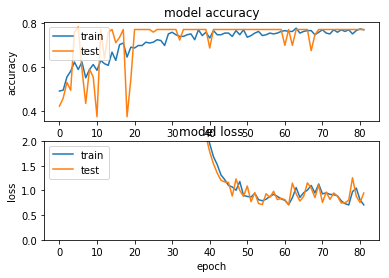

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(1)

# summarize history for accuracy
plt.subplot(211)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

# summarize history for loss
plt.subplot(212)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.ylim(ymax=2, ymin=0)
plt.show()

In [12]:
model.evaluate(X_test, y_test)

67/67 [==============================] - 1s 11ms/step


{'acc': 0.7761194029850746,
 'auroc_score': 0.7679487179487179,
 'loss': 0.6965614014597081}